In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import networkx as nx

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Read graphml

In [112]:
graph = nx.read_graphml('graph.xml')
print(graph.edges())
print(graph.nodes())
print(list(graph.neighbors('n0')), list(graph.neighbors('n1')))

[('n0', 'n1'), ('n0', 'n2'), ('n1', 'n3'), ('n1', 'n4'), ('n2', 'n5'), ('n2', 'n6'), ('n3', 'n7'), ('n4', 'n8'), ('n5', 'n9'), ('n5', 'n10'), ('n6', 'n11'), ('n8', 'n12'), ('n8', 'n13'), ('n11', 'n14'), ('n11', 'n15'), ('n12', 'n16'), ('n12', 'n17')]
['n0', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'n10', 'n11', 'n12', 'n13', 'n14', 'n15', 'n16', 'n17']
['n1', 'n2'] ['n3', 'n4']


### Layered-Tree-Draw for binary trees

In [115]:
def get_borders(block):
    borders = {}
    for v, (x, y) in block.items():
        if y not in borders:
            borders[y] = [x, x]
        else:
            borders[y][0] = min(borders[y][0], x)
            borders[y][1] = max(borders[y][1], x)
    return borders

def find_shift(bl, br):
    shift = -10000
    bl, br = get_borders(bl), get_borders(br)
    for key in bl:
        if key in br:
            left = bl[key][1]
            right = br[key][0]
            shift = max(shift, left - right + 1)
    return shift

def layered_tree(v, d):
    neighbors = list(graph.neighbors(v))
    if neighbors:
        if len(neighbors) == 1:
            block = layered_tree(neighbors[0], d + 1)
            block.update({v: (0, d)})
            return block
        else:
            left, right = neighbors
            bleft, bright = layered_tree(left, d + 1), layered_tree(right, d + 1)
            shift = find_shift(bleft, bright)
            result = bleft
            for w, (x, y) in bright.items():
                result[w] = (x + shift, y)
            result[v] = (0, d)
            return result
    else:
        return {v: (0, d)}

In [116]:
block = layered_tree('n0', 0)
print(block)

{'n7': (0, 3), 'n3': (0, 2), 'n16': (1, 5), 'n17': (2, 5), 'n12': (1, 4), 'n13': (2, 4), 'n8': (1, 3), 'n4': (1, 2), 'n1': (0, 1), 'n9': (2, 3), 'n10': (3, 3), 'n5': (2, 2), 'n14': (4, 4), 'n15': (5, 4), 'n11': (4, 3), 'n6': (4, 2), 'n2': (2, 1), 'n0': (0, 0)}


## drawing result

In [123]:
def draw(v):
    plt.annotate(v, xy=(block[v][0], -block[v][1]), size=20)
    for w in graph.neighbors(v):
        plt.plot([block[v][0], block[w][0]], 
                 [-block[v][1], -block[w][1]], '-o', color='blue')
        draw(w)

AttributeError: module 'matplotlib.pyplot' has no attribute 'save'

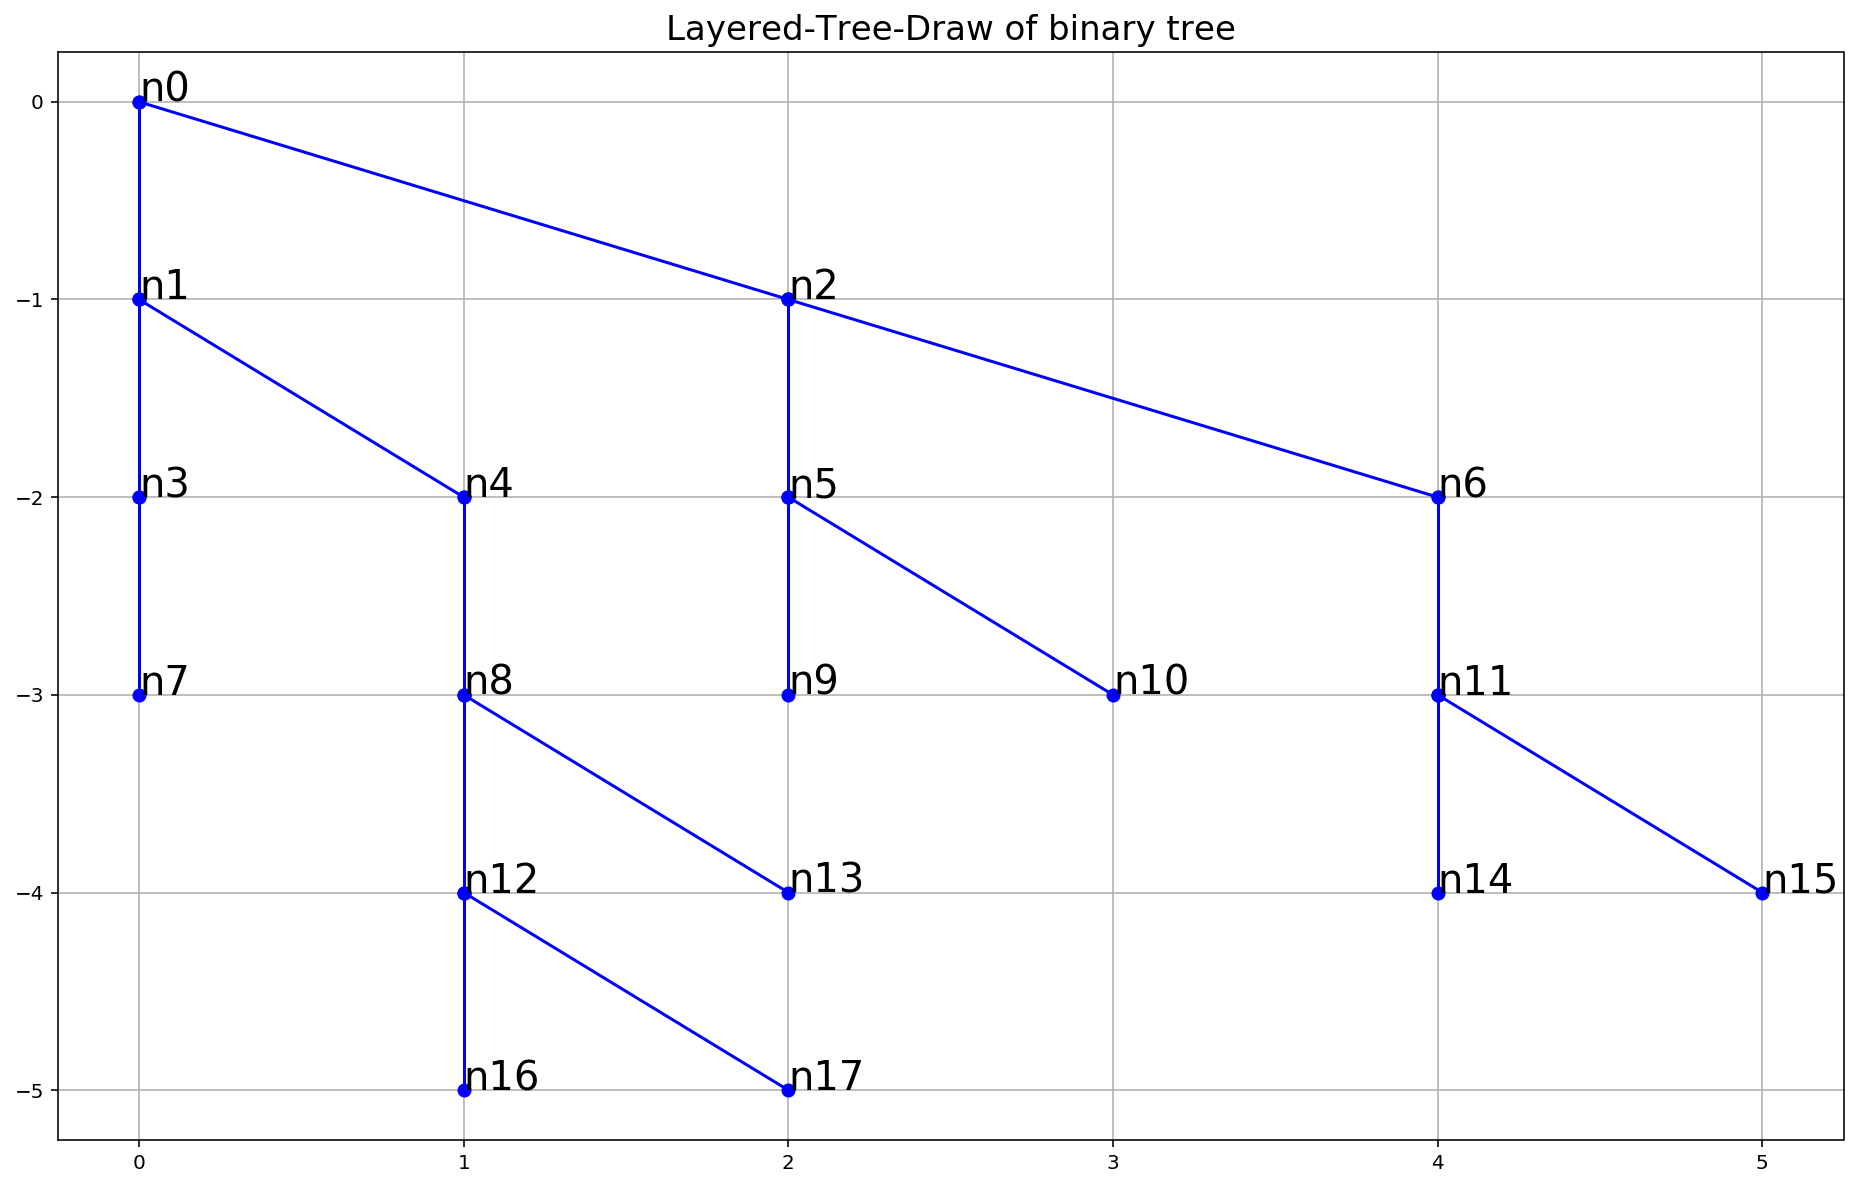

In [126]:
plt.figure(figsize=(16, 10))
plt.title('Layered-Tree-Draw of binary tree', fontsize=17)
draw('n0')
plt.grid()
plt.save('draw.png')
plt.show()